<a href="https://colab.research.google.com/github/NijjohUnno/SalesAnalysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First we import the python Libraries and the dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

January = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_January_2019.csv')
February = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_February_2019.csv')
March = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv')
April = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv')
May = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv')
June = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_June_2019.csv')
July = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_July_2019.csv')
August = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_August_2019.csv')
September = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_September_2019.csv')
October = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_October_2019.csv')
November = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_November_2019.csv')
December = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_December_2019.csv')

In [ ]:
January.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


**Merging the 12 months sales Data into a single file.**

In [ ]:
sales_year = pd.concat([January, February, March,April, May, June, July, August, September, October, November, December])



**Read updated DataFrame.**

In [ ]:
sales_year.head(10)

NameError: ignored

**Check the new data frame**

In [ ]:
sales_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185441 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          184907 non-null  object
 1   Product           184907 non-null  object
 2   Quantity Ordered  184907 non-null  object
 3   Price Each        184907 non-null  object
 4   Order Date        184907 non-null  object
 5   Purchase Address  184907 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Checking Sum of null values for each column** 

In [ ]:
print(sales_year.isnull().sum())



Order ID            534
Product             534
Quantity Ordered    534
Price Each          534
Order Date          534
Purchase Address    534
dtype: int64


**Checking rows of Nan**

In [ ]:
nan_rows = sales_year[sales_year.isna().any(axis=1)]
print(nan_rows)

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
22945      NaN     NaN              NaN        NaN        NaN              NaN
22962      NaN     NaN              NaN        NaN        NaN              NaN
23309      NaN     NaN              NaN        NaN        NaN              NaN
23996      NaN     NaN              NaN        NaN        NaN              NaN
24730      NaN     NaN              NaN        NaN        NaN              NaN

[534 rows x 6 columns]


**Dropping rows of Nan**

In [ ]:
sales_year = sales_year.dropna()
nan_rows = sales_year[sales_year.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


**Add Month Column**

In [ ]:
# Extract the month component and add it as a new column
s = pd.Series('Order Date')
sales_year['Month'] = sales_year['Order Date'].str.slice(stop=2)
sales_year.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001",12


**What was the best month for sales? How much was earned that month**

In [ ]:
# drop rows with missing values in the 'Month' column
sales_year.dropna(subset=['Month'], inplace=True)
# convert the 'Month' column to integer data type
sales_year['Month'] = sales_year['Month'].astype(int)
# show the data type of the 'Month' column
print(sales_year['Month'].dtypes)


int64


In [ ]:
#Convert Quantity ordered and price to correct data type
sales_year['Quantity Ordered'] = pd.to_numeric(sales_year['Quantity Ordered']) #make integer
sales_year['Price Each'] = pd.to_numeric(sales_year['Price Each']) #make float
print(sales_year.dtypes)

In [ ]:
#add 'Total_Sales' Column
sales_year['Total_Sales'] = sales_year['Quantity Ordered'] * sales_year['Price Each']
sales_year.head()

In [ ]:
#Total_sales Per Month
sales_by_month = sales_year.groupby('Month').sum('Total_Sales')
# sort the results by descending order of 'Total_Sales'
# display the resulting dataframe
print(sales_by_month)

**The best month for sales was March with sales worth 5610993.26**

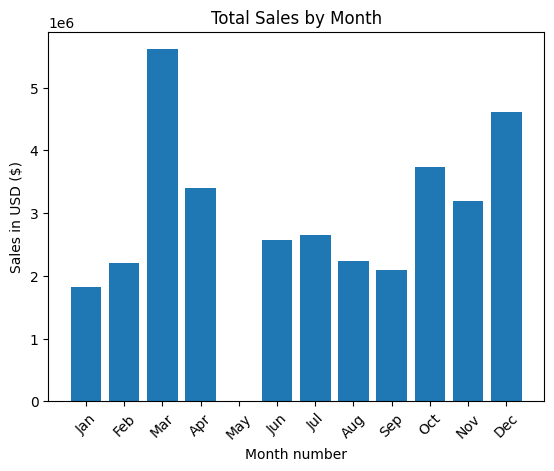

In [ ]:
import matplotlib.pyplot as plt
import calendar
Month = range(1,13)
month_names = [calendar.month_name[i][:3] for i in Month]

plt.bar(month_names,sales_by_month['Total_Sales'])
plt.xticks(rotation=45)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Total Sales by Month')
plt.show()

**Best Performing Region**